# Projet PRSTIM/TIFO

L'objectif de ce projet consiste à compter les bateaux sur chacune des deux images.

# Sommaire

- Chargement des images
- Segmentation de la date
- Segmentation de l'eau
- On compte les bateaux
- Lecture de la date incrustée
- Segmentation de l'eau

In [71]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import morphology
from skimage.morphology import remove_small_objects

In [5]:
!unzip data.zip

Archive:  data.zip
replace data/Tulips_0504.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [8]:
!ls data

Tulips_0504.png  Tulips_1504.png  Venice_2019.png	 Venice_2020.png
Tulips_1004.png  Tulips_2004.png  Venice_2019_scrib.png


## Chargement des images

In [54]:
# Load images
im1, im2 = (
    cv2.imread("data/Venice_2019.png"),
    cv2.imread("data/Venice_2020.png"),
)

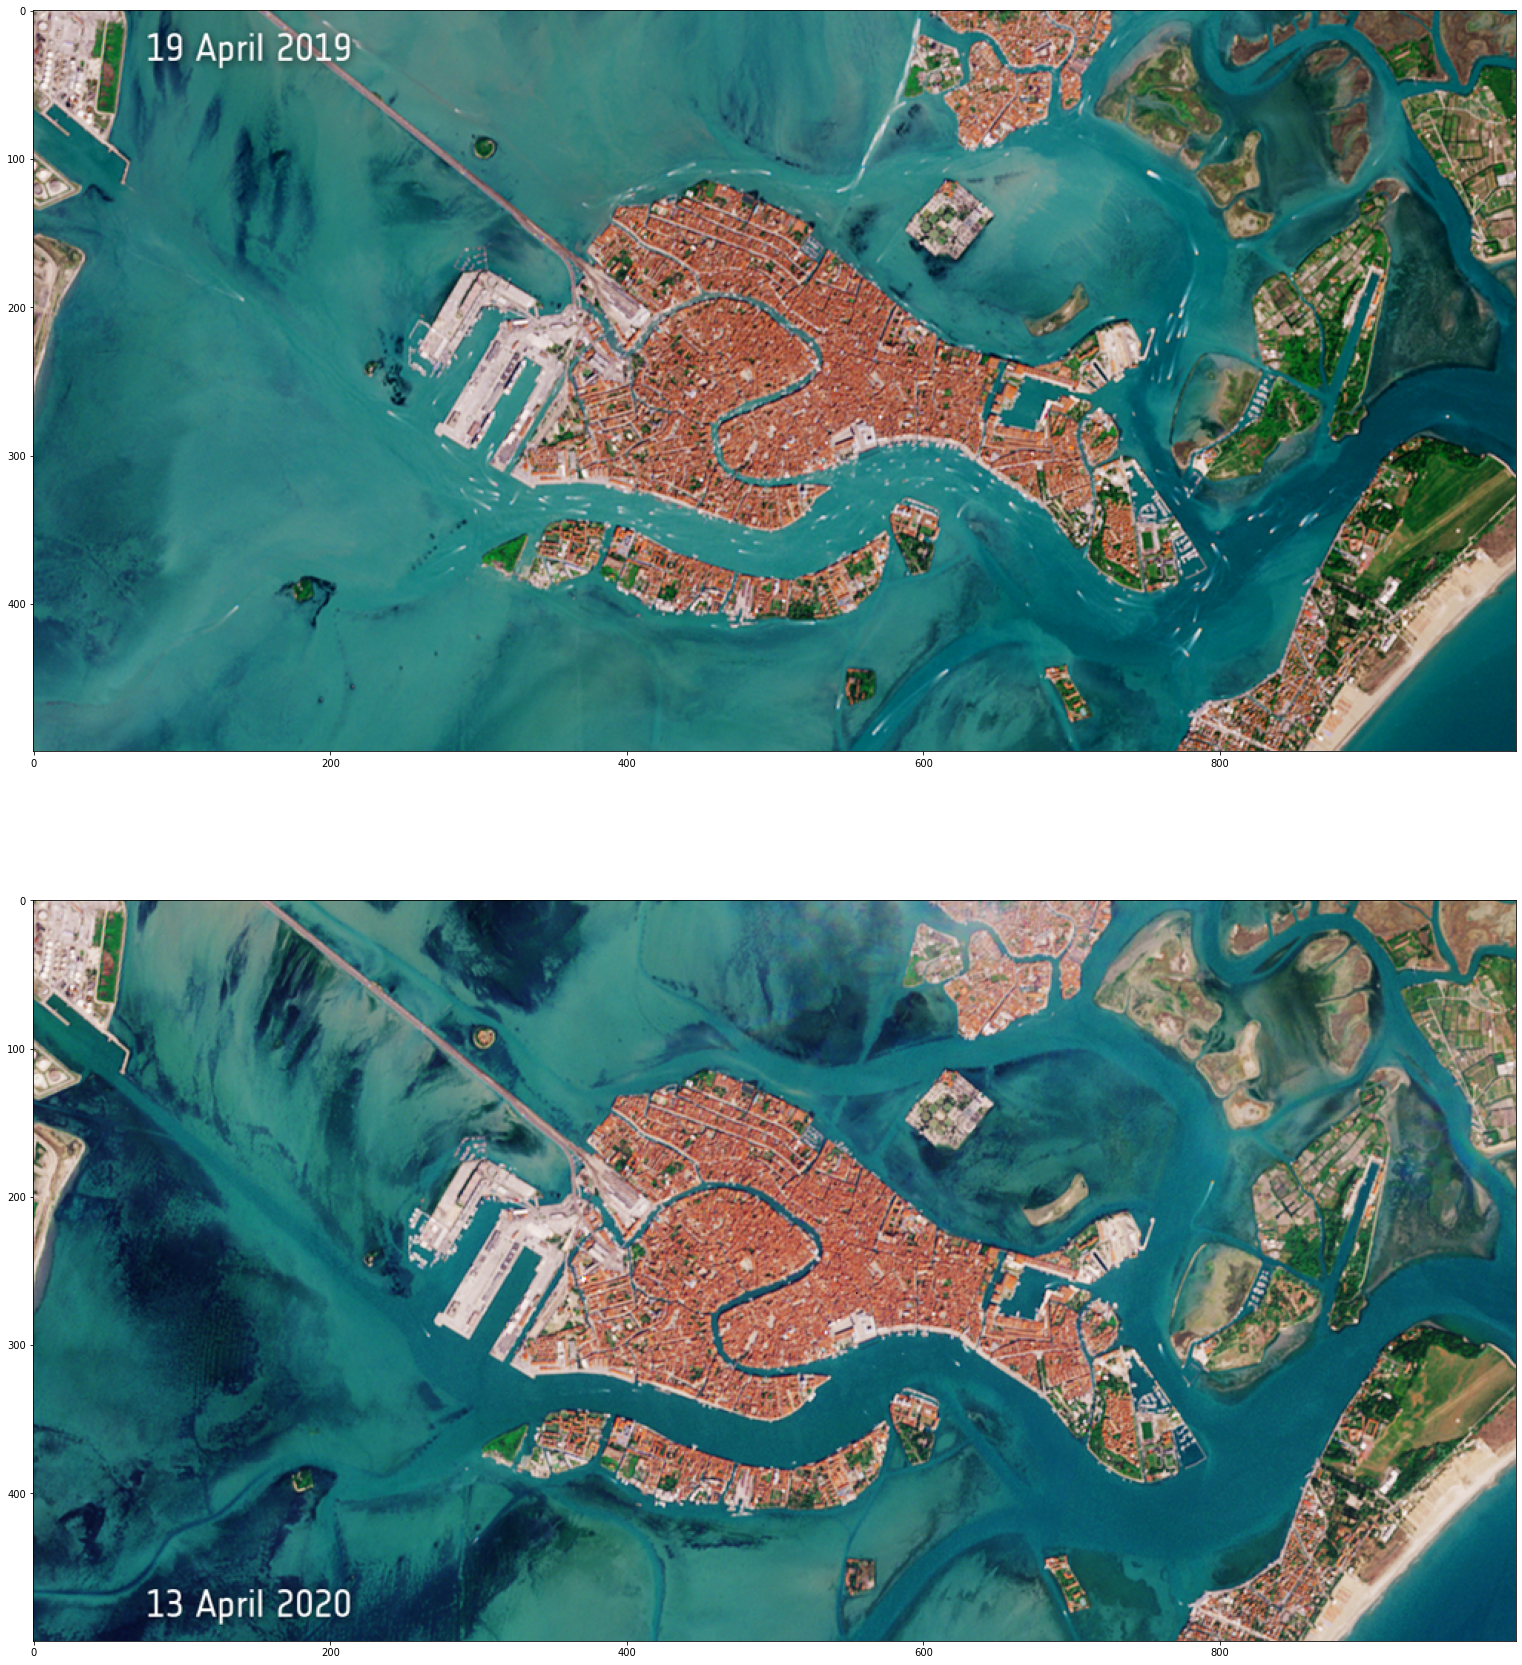

In [55]:
# Display
def bgr_to_rgb(img):
    b,g,r = cv2.split(img)
    return cv2.merge([r,g,b])

rgb1, rgb2 = bgr_to_rgb(im1), bgr_to_rgb(im2)
plt.figure(figsize=(60, 30))
plt.subplot(2, 1, 1)
plt.imshow(rgb1)
plt.subplot(2, 1, 2)
plt.imshow(rgb2)

## Segmentation de la date

In [11]:
def getFirstLastWhitePixel(img):
    topleft = (len(img),len(img))
    botright = (0,0)
    foundFirst = False
    for i, y in enumerate(img):
        for j, x in enumerate(y):
            if x == 255:
                topleft = (min(i, topleft[0]), min(j, topleft[1]))
                botright = (max(i, botright[0]), max(j, botright[1]))
    return (topleft, botright)

In [12]:
def dateSeg(img):
    plt.figure(figsize=(100,50))
    copy = img.copy()
    gray = cv2.cvtColor(copy, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)

    thresh = skimage.morphology.closing(thresh, skimage.morphology.square(100))
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    x, y, w, h = -1, -1, -1, -1
    for c in contours:
        tx,ty,tw,th = cv2.boundingRect(c)
        if (x, y, w, h) == (-1, -1, -1, -1):
            x, y, w, h = tx,ty,tw,th
        if tw>w and th>h:
            x, y, w, h = tx,ty,tw,th
    new_img=img[y-5:y+h+5,x-5:x+w+5]
    plt.imshow(new_img)
    

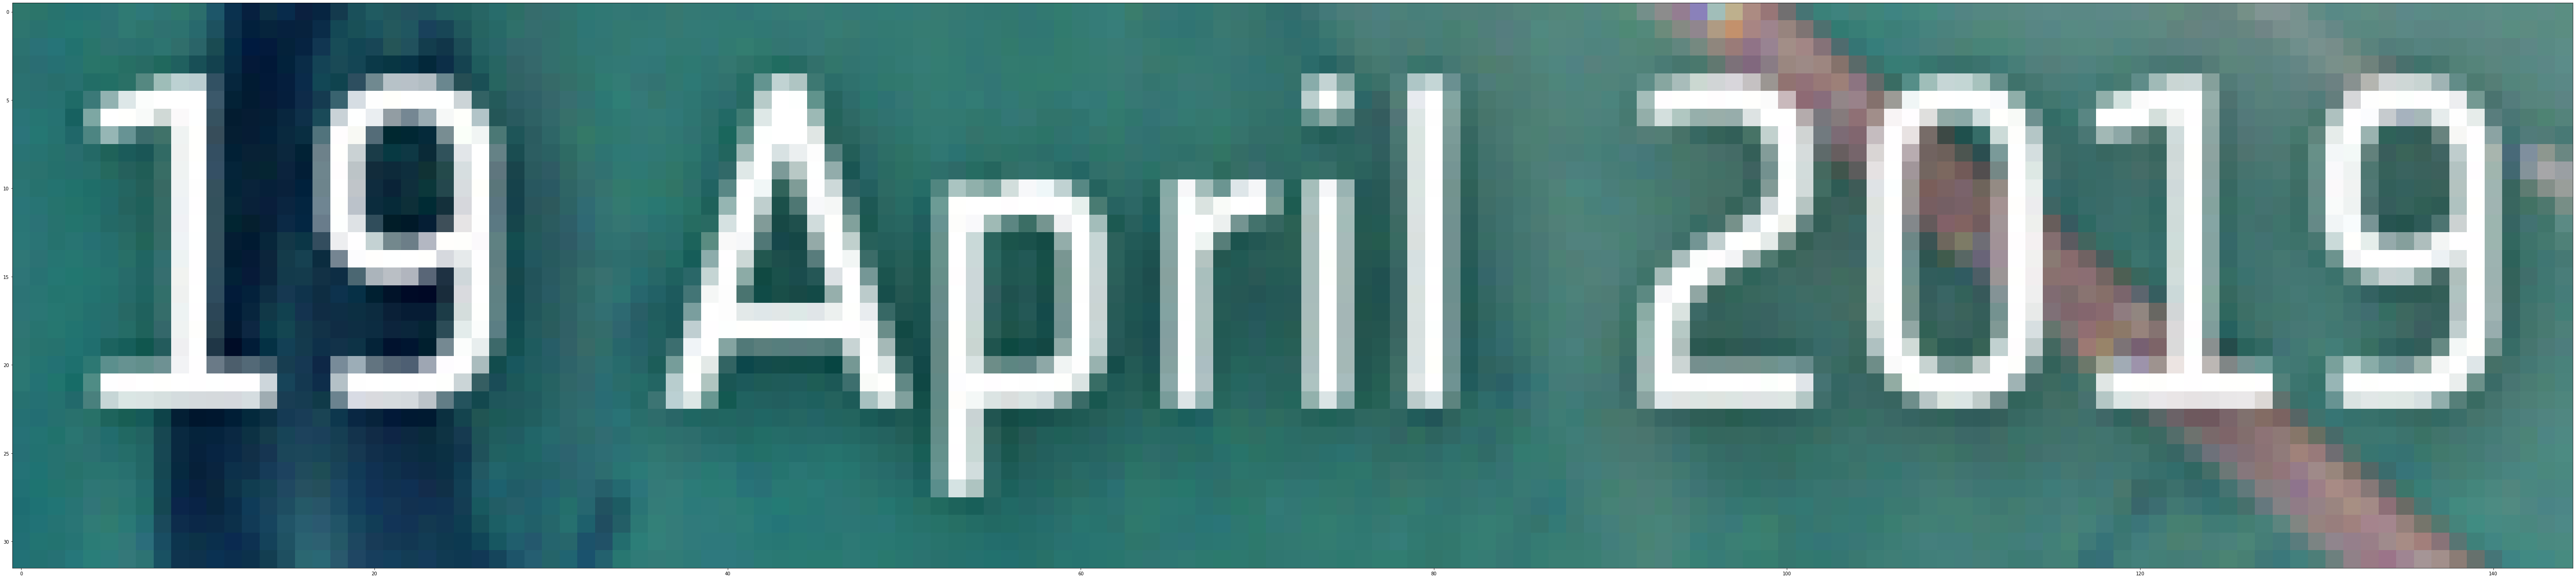

In [13]:
dateSeg(rgb1)

## Segmentation de l'eau

In [69]:
# Check average water color & color proportions
s = float(im1[150][300][0]) + im1[150][300][1] + im1[150][300][2]
print(im1[150][300], im1[150][300][0] / s, im1[150][300][1] / s, im1[150][300][2] / s)  # Clear

s = float(im1[5][300][0]) + im1[5][300][1] + im1[5][300][2]
print(im1[5][300], im1[5][300][0] / s, im1[5][300][1] / s, im1[5][300][2] / s) # Less clear

s = float(im1[300][0][0]) + im1[300][0][1] + im1[300][0][2]
print(im1[300][0], im1[300][0][0] / s, im1[300][0][1] / s, im1[300][0][2] / s) # Dark

s = float(im1[490][975][0]) + im1[490][975][1] + im1[490][975][2]
print(im1[490, 975], im1[490][975][0] / s, im1[490][975][1] / s, im1[490][975][2] / s)

s = float(im1[490][975][0]) + im1[490][975][1] + im1[490][975][2]
print(im2[490][975], im1[490][975][0] / s, im1[490][975][1] / s, im1[490][975][2] / s)

s = float(im1[10][570][0]) + im1[10][570][1] + im1[10][570][2]
print(im1[10][570], im1[10][570][0] / s, im1[10][570][1] / s, im1[10][570][2] / s)

s = float(im1[50][570][0]) + im1[50][570][1] + im1[50][570][2]
print(im1[50][570], im1[50][570][0] / s, im1[50][570][1] / s, im1[50][570][2] / s)

s = float(im2[499][55][0]) + im2[499][55][1] + im2[499][55][2]
print(im2[499][55], im2[499][55][0] / s, im2[499][55][1] / s, im2[499][55][2] / s)

s = float(im1[260][940][0]) + im1[260][940][1] + im1[260][940][2]
print(im1[260][940], im1[260][940][0] / s, im1[260][940][1] / s, im1[260][940][2] / s)

s = float(im2[230][90][0]) + im2[230][90][1] + im2[230][90][2]
print(im2[230][90], im2[230][90][0] / s, im2[230][90][1] / s, im2[230][90][2] / s)

[114  98  39] 0.4541832669322709 0.3904382470119522 0.1553784860557769
[126 134  81] 0.36950146627565983 0.39296187683284456 0.2375366568914956
[92 83 15] 0.4842105263157895 0.4368421052631579 0.07894736842105263
[80 64  0] 0.5555555555555556 0.4444444444444444 0.0
[95 69  3] 0.5555555555555556 0.4444444444444444 0.0
[135 132  64] 0.4078549848942598 0.3987915407854985 0.1933534743202417
[131 135  59] 0.40307692307692305 0.4153846153846154 0.18153846153846154
[45 13  7] 0.6923076923076923 0.2 0.1076923076923077
[75 59  0] 0.5597014925373134 0.44029850746268656 0.0
[60 41 14] 0.5217391304347826 0.3565217391304348 0.12173913043478261


In [16]:
def is_water(px):
    """
    For BGR pixel
    """
    cond1 = px[0] > 60 and px[1] > 50 and px[2] < 90
    cond2 = px[0] > 40 and px[1] < 50 and px[2] < 20
    cond3 = px[0] > 30 and px[1] < 30 and px[2] < 15
    cond4 = px[0] > 50 and px[1] < 90 and px[2] < 25
    return cond1 or cond2 or cond3 or cond4

In [17]:
def get_water(img):
    water = np.zeros((img.shape[0], img.shape[1]))
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if is_water(img[x][y]):
                water[x][y] = 1
    return water


water1 = get_water(im1)
water2 = get_water(im2)

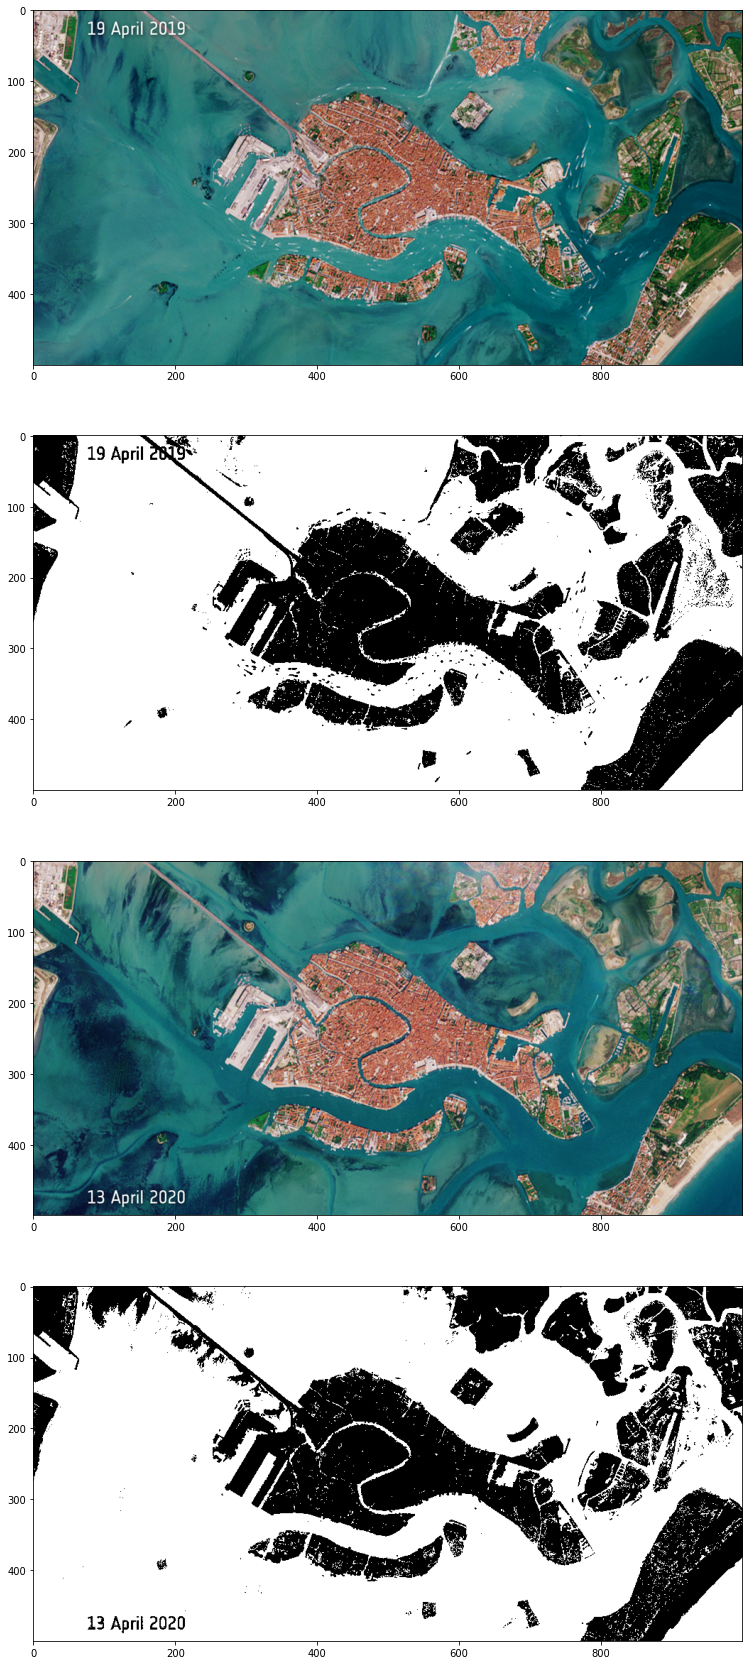

In [18]:
plt.figure(figsize=(60, 30))
plt.subplot(4, 1, 1)
plt.imshow(rgb1)
plt.subplot(4, 1, 2)
plt.imshow(water1, cmap="gray")
plt.subplot(4, 1, 3)
plt.imshow(rgb2)
plt.subplot(4, 1, 4)
plt.imshow(water2, cmap="gray")

## On compte les bateaux

Les bateaux font partie des éléments qui ne restent pas d'une image à l'autre. Comprendre : à une position donnée, la probabilité d'avoir un bateau sur les deux images est très faible. On peut donc travailler sur les différences entre les deux images. Voici notre plan d'attaque :

- Calcul de `abs(im2 - im1)` en niveaux de gris
    - Les zones claires constituent de grands écarts entre `im1` et `im2`
    - Les zones foncées constituent l'absence de différence entre `im1` et `im2`
- Binarisation, par seuillage, du résultat
    - On obtient un ensemble d'objets "différences" sur un fond noir
- Discrimination des objets : bateau ou pas bateau ?
    - Forme, taille, position relative à l'eau
- Bateau dans `im1` ou `im2` ?
    - Comparaison `im1`/`im2` à la position étudiée

### Pré-traitement

In [56]:
def preprocess(img, water):
    # Grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Remove water
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if water[x][y]:
                img[x][y] = 0
    return img.astype(np.int16)  # Because uint8 won't allow negatives when we im2-im1


processed_im1, processed_im2 = preprocess(im1, water1), preprocess(im2, water2)

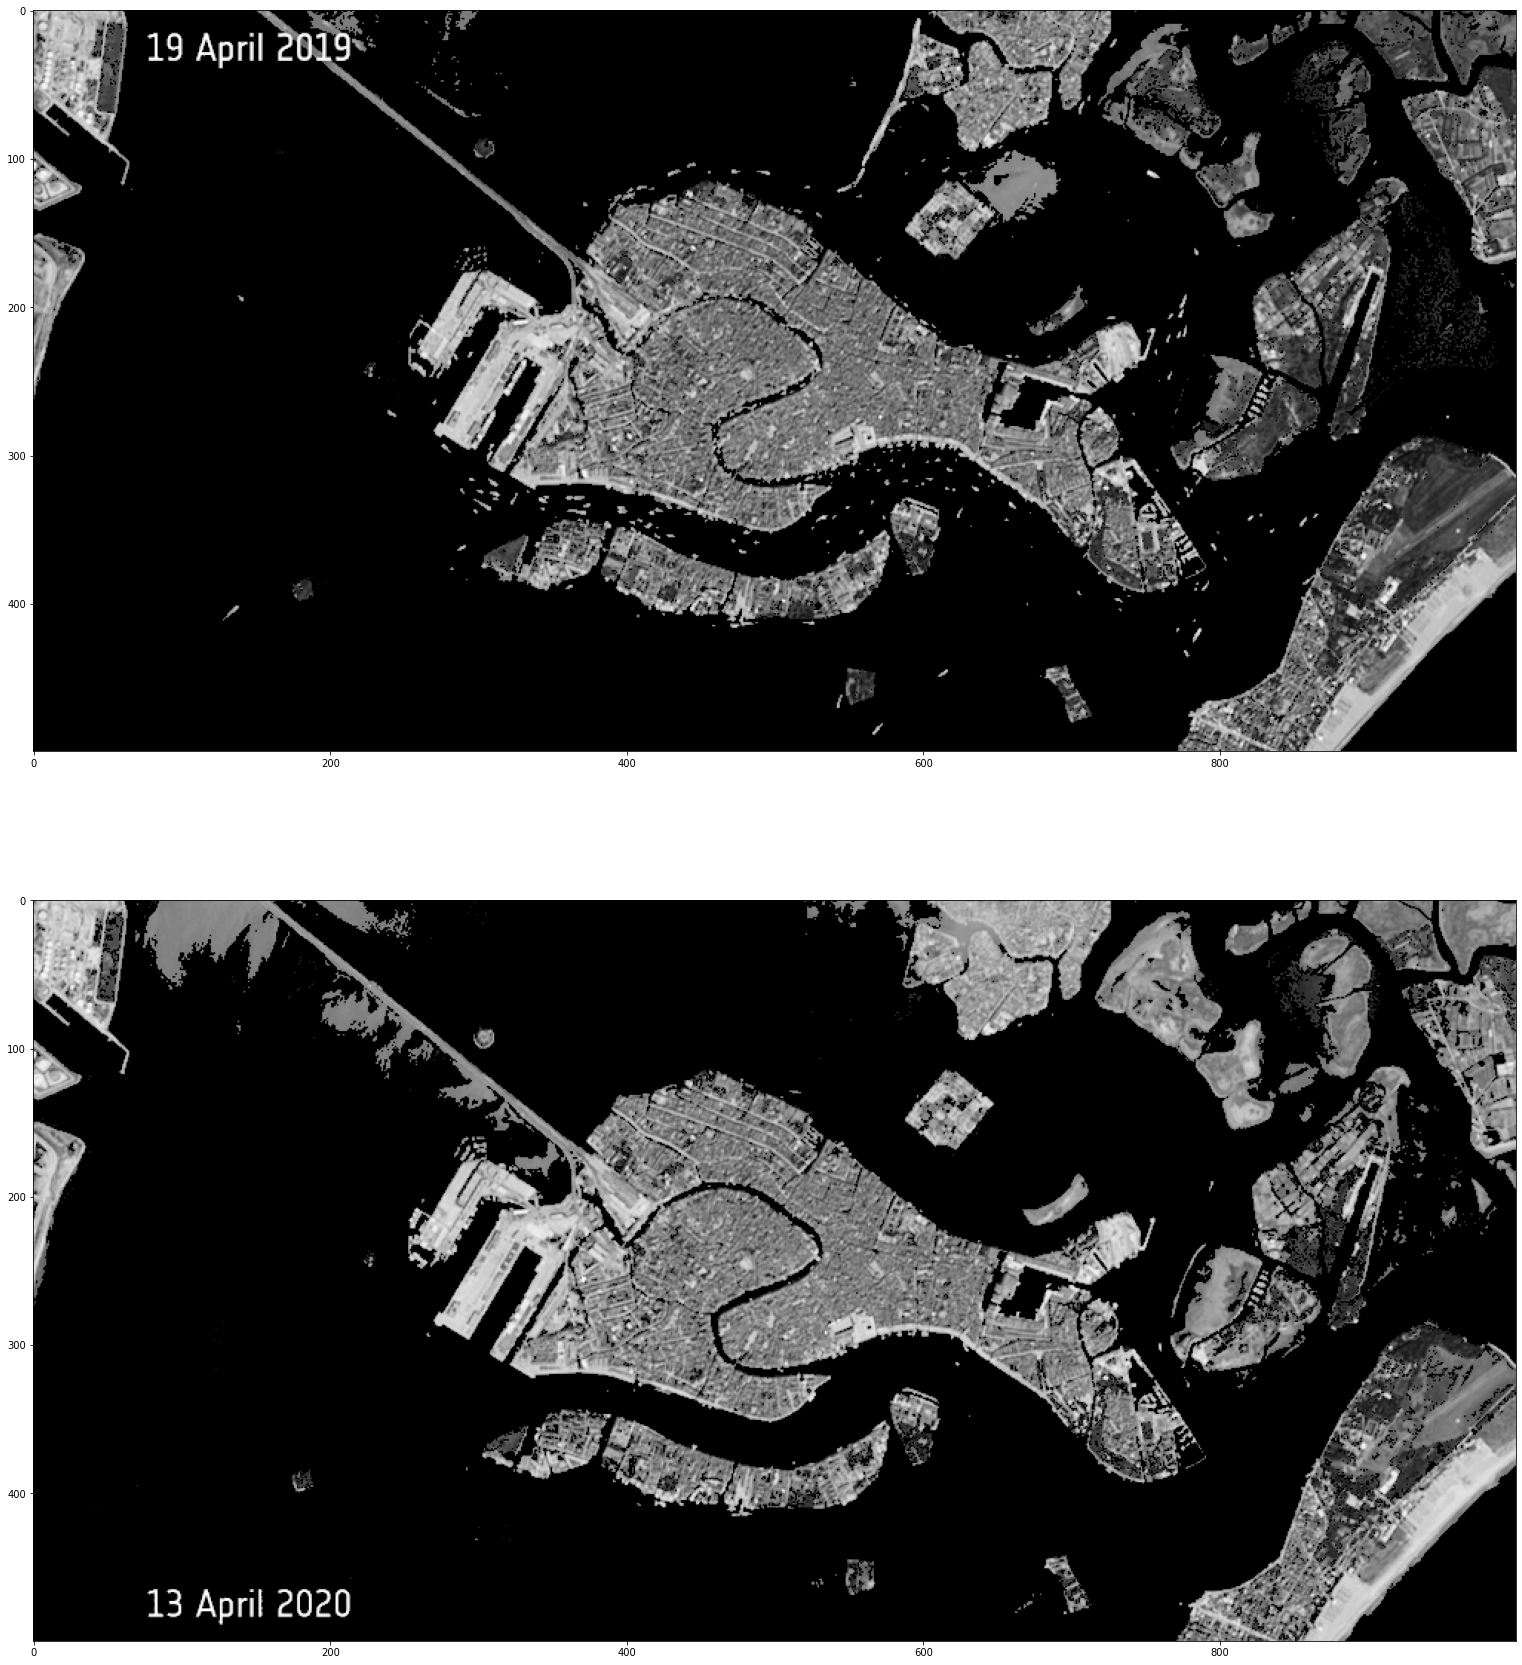

In [57]:
# Display
plt.figure(figsize=(60, 30))
plt.subplot(2, 1, 1)
plt.imshow(processed_im1, cmap="gray")
plt.subplot(2, 1, 2)
plt.imshow(processed_im2, cmap="gray")

### Différence entre `im1` et `im2`

In [58]:
# Différence entre les deux niveaux de gris
diff = np.absolute(processed_im2 - processed_im1)

# Distance euclidienne (dans R^3) pixel à pixel
# dist_rgb = np.apply_along_axis(
#     np.linalg.norm,
#     axis=2,
#     arr=im2-im1
# )

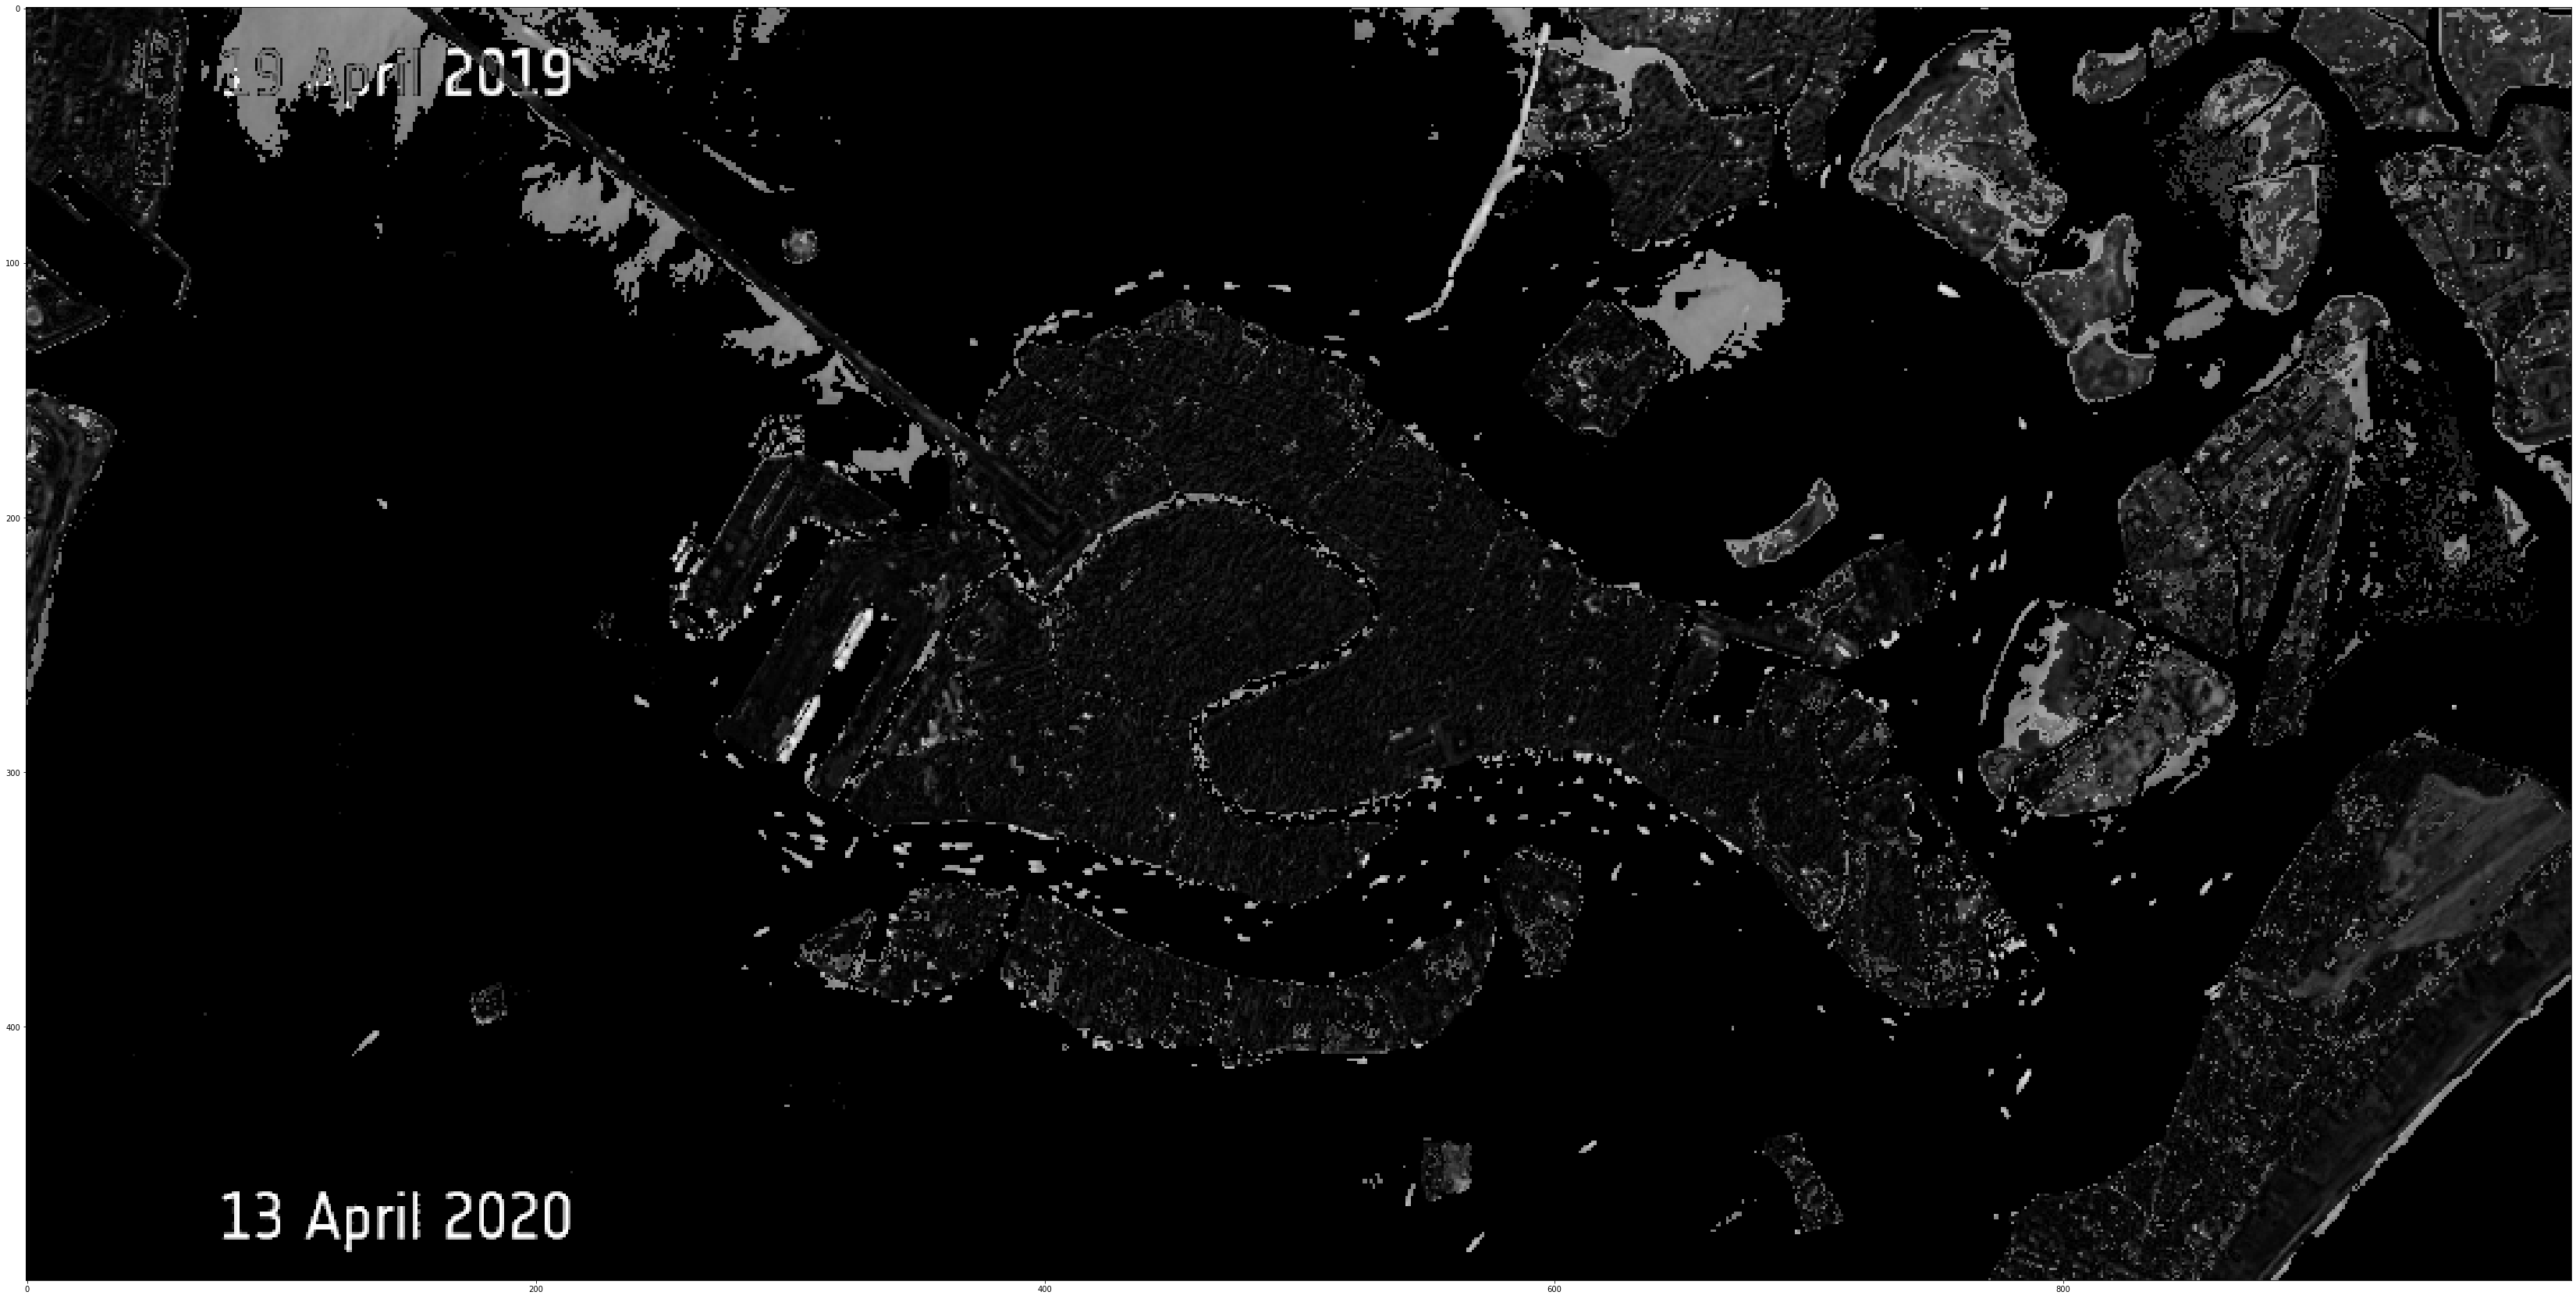

In [59]:
# Display
plt.figure(figsize=(60, 30))
# plt.subplot(2, 1, 1)
plt.imshow(diff, cmap="gray")
# plt.subplot(2, 1, 2)
# plt.imshow(dist_rgb, cmap="gray")

### Seuillage

Pour chaque pixel non nul de `diff`, le but est de déterminer s'il s'agit de bruit ou d'un vrai changement entre `im1` et `im2`.

On peut supposer que le bruit suit une loi normale $N(\mu, \sigma^2)$, dont les paramètres peuvent être estimés à partir des images d'entrée. Nous allons leur donner des valeurs arbitraires pour commencer à travailler.

#### Hypothèses

Soit $X$ la variable aléatoire qui prend les valeurs des pixels de `diff`.

Pour chaque pixel, voici nos hypothèses :

$H_0$ : pas de changement, $X \sim N(\mu_0, \sigma_0^2)$

$H_1$ : changement, $X \sim N(\mu_1, \sigma_1^2)$

Considérer que $\sigma_0 = \sigma_1 = \sigma$ semble raisonnable, et va grandement nous simplifier les calculs.

#### Détermination du seuil

Notons notre seuil $\gamma_\alpha$.

##### Première méthode

$\frac{p_1(x)}{p_0(x)} > \lambda$ si $H_1$

$\frac{p_1(x)}{p_0(x)} < \lambda$ si $H_0$

On obtient, après développement :

$$\gamma_\alpha = \frac{\sigma^2 \log(\lambda)}{\mu_1 - \mu_0} + \mu_0 + \mu_1$$

##### Seconde méthode

On cherche la valeur de $\gamma_\alpha$ telle que la probabilité de fausse alarme soit fixée, c'est-à-dire, pour $\alpha$ une probabilité donnée :

$\mathbb{P}(x > \gamma_\alpha | H_0) = \alpha$ i.e. $\int_{\gamma_\alpha}^{+\infty} \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{1}{2}\frac{(t - \mu_0)^2}{\sigma^2})\text{d}t = \alpha$

On obtient, en posant $u = \frac{t - \mu_0}{\sigma}$ :

$$\gamma_\alpha = \sigma Q^{-1}(\alpha) + \mu_0$$

avec $Q(x) = \int_x^{+\infty} \frac{1}{\sqrt{2\pi}}\exp(-\frac{1}{2}t^2)\text{d}t$

Nous prendrons $\alpha = 0.05$, sachant que $Q^{-1}(0.05) = 1.65$

In [65]:
# Parameters

# gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
# gray2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
# diff = np.absolute(gray2 - gray1)
# av = diff.mean()
# var = diff.var()
# var

mu_0  = 0
sigma = math.sqrt(255)
mu_1  = 200

In [69]:
# First method threshold
lamb = 100
thr1 = (sigma ** 2) * math.log(lamb) / (mu_1 - mu_0) + mu_0 + mu_1
thr1

205.87159198713482

In [70]:
# Second method threshold
thr2 = int(sigma * 1.65 + mu_0)
thr2

26

Faire un choix...

#### Binarisation de l'image

In [61]:
binary = diff > thr1

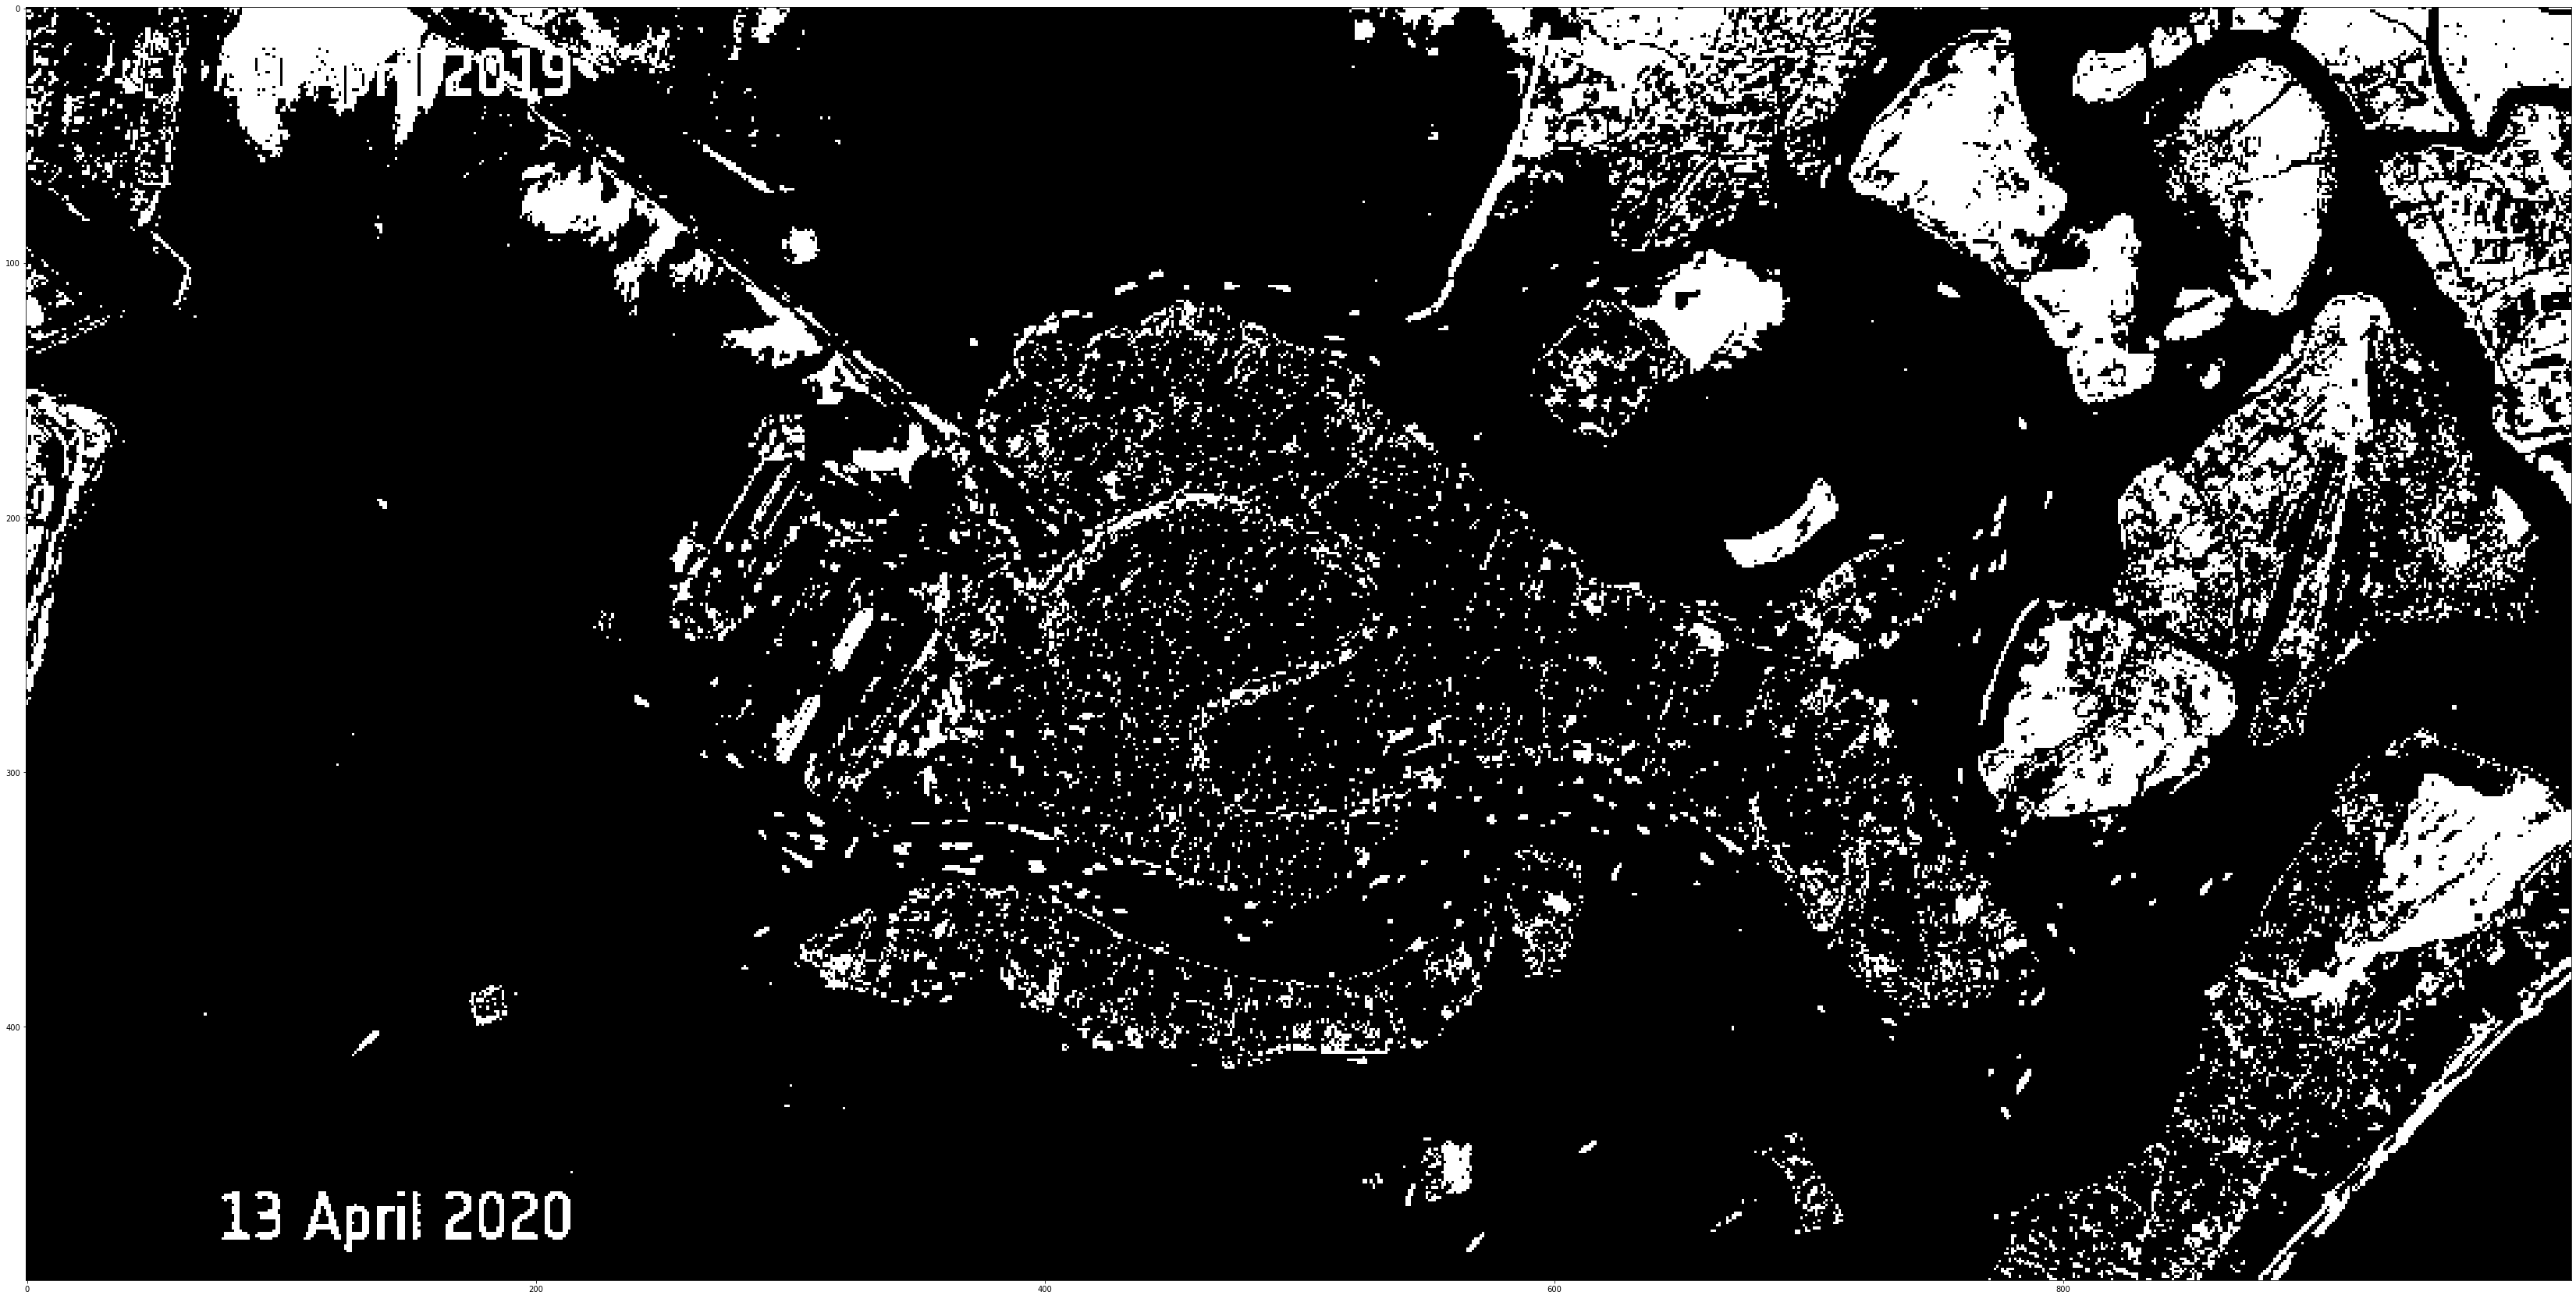

In [62]:
# Display
plt.figure(figsize=(60, 30))
plt.imshow(binary, cmap="gray")

#### Suppression des grandes composantes connexes

In [76]:
big_objects = remove_small_objects(binary, min_size=100, connectivity=8)
removed = binary ^ big_objects

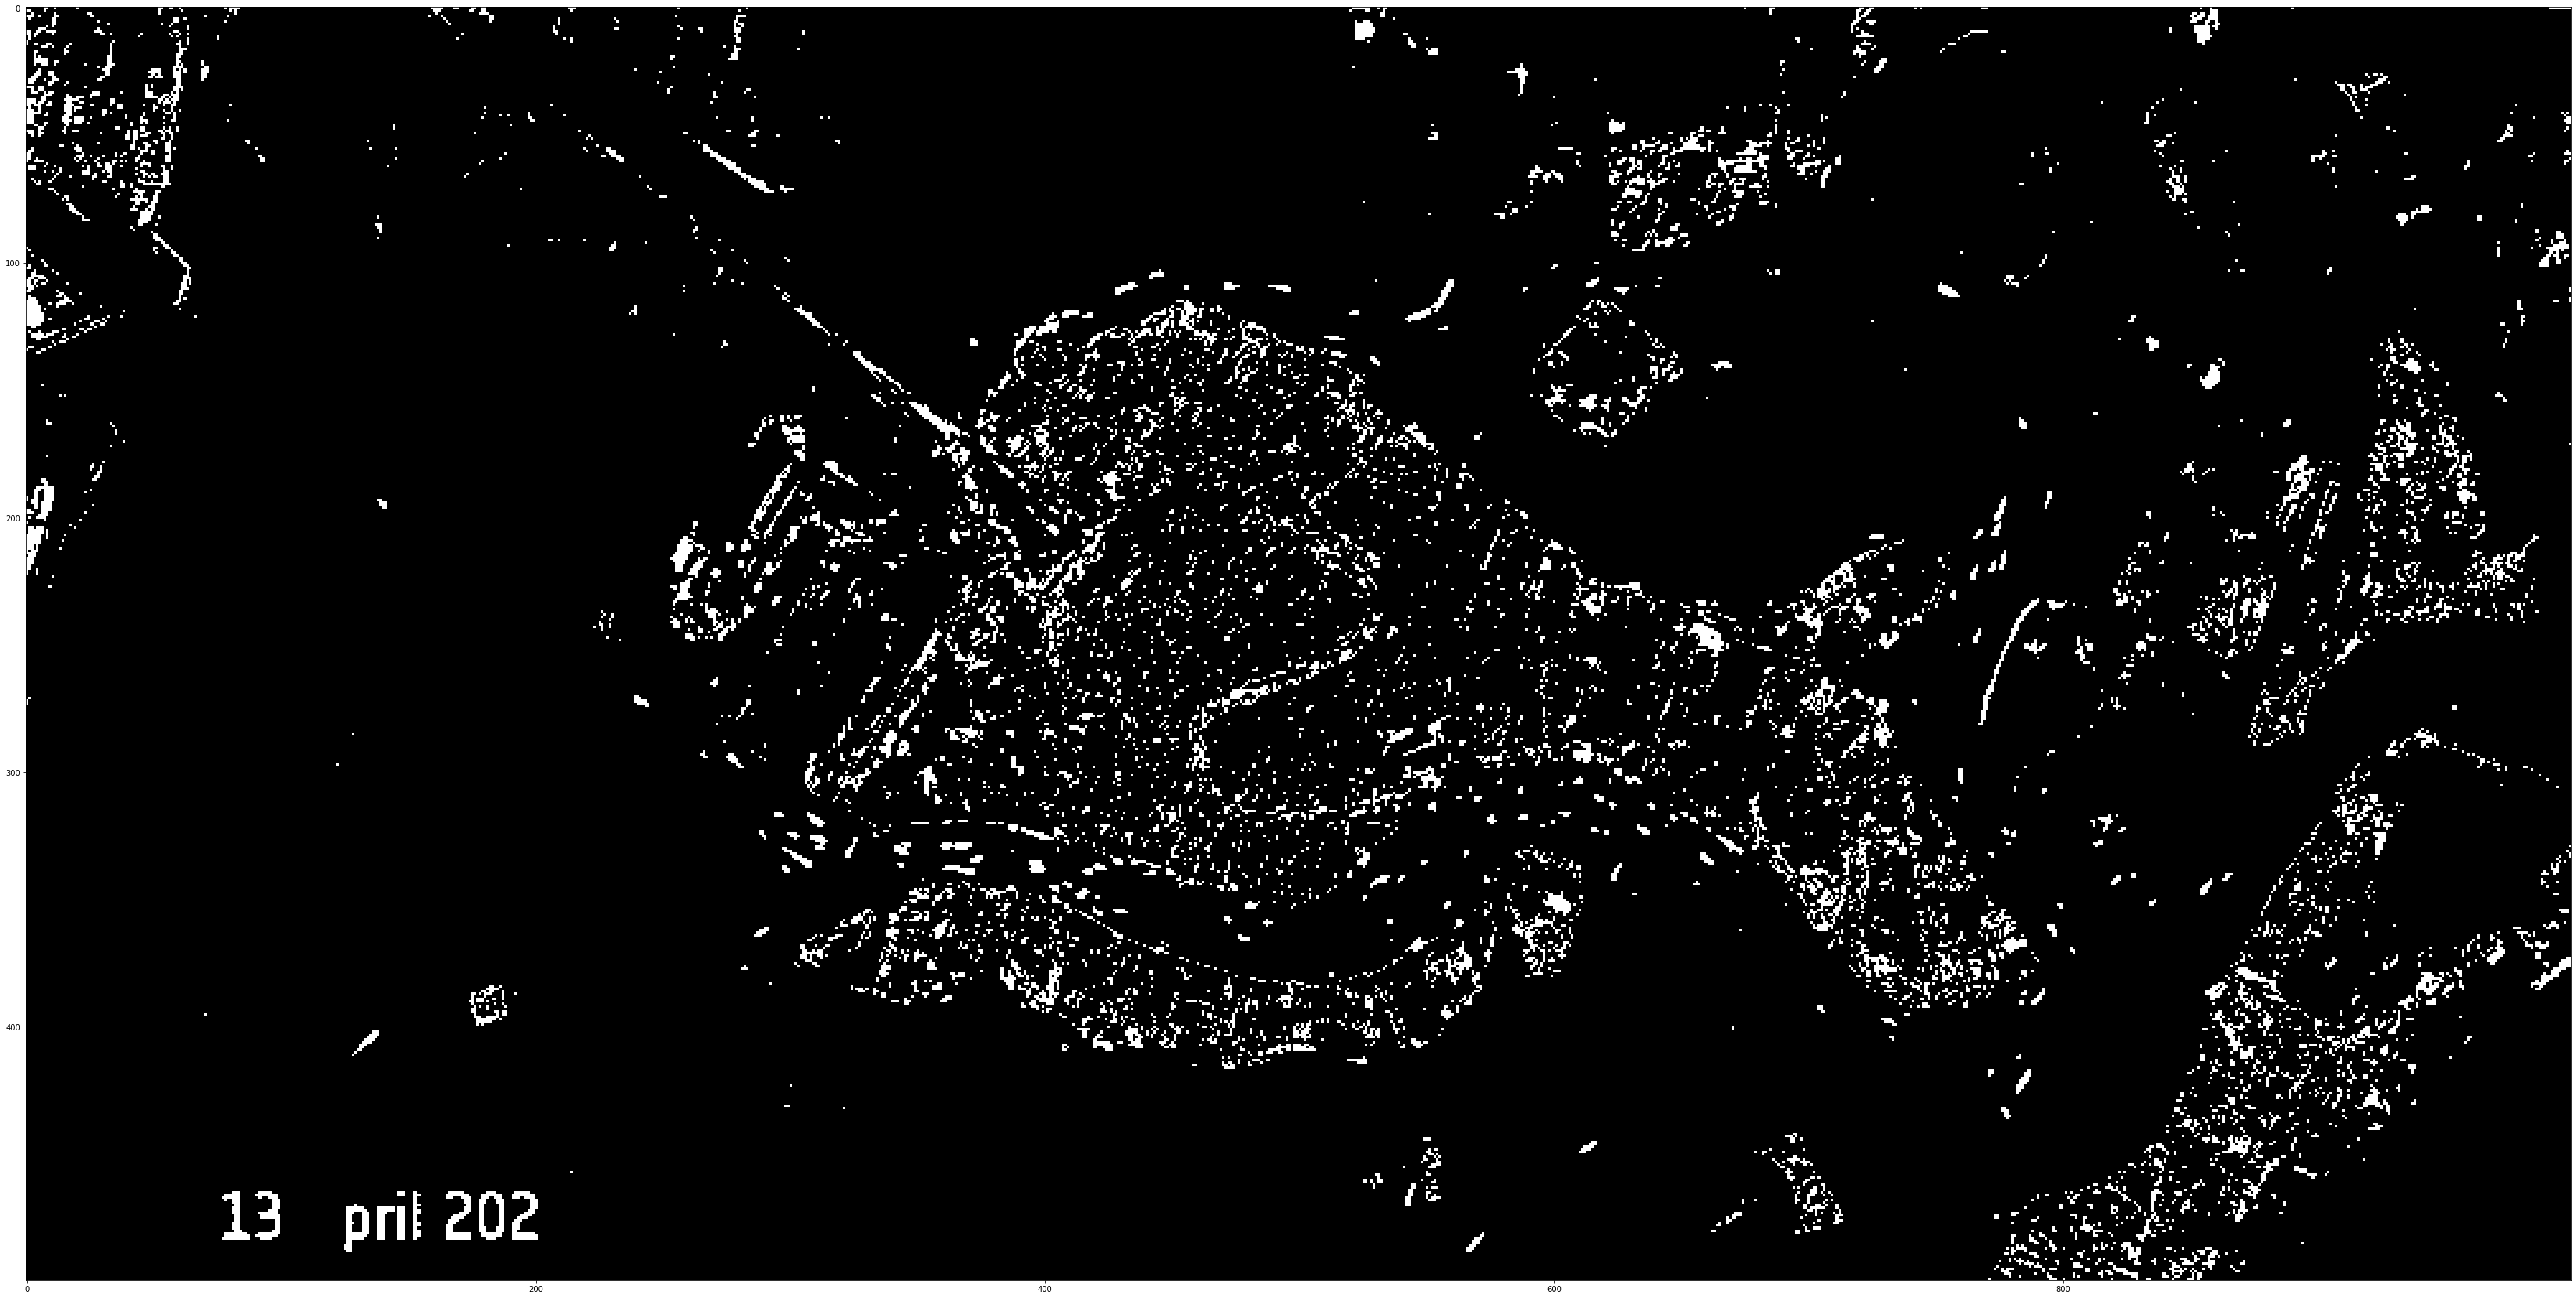

In [77]:
# Display
plt.figure(figsize=(60, 30))
plt.imshow(removed, cmap="gray")